# SPARK - Visualization using pyspark

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder \
            .appName('teleco_data') \
            .master('local[*]') \
            .config('spark.ui.showConsoleProgress', True) \
            .config('spark.sql.repl.eagerEval.enabled', True) \
            .config('spark.sql.session.timeZone','UTC') \
            .getOrCreate()
spark

In [6]:
DATA_PATH = "customer_churn.csv"
sdf = spark.read.option('quote','"').option('escape','\\').csv(DATA_PATH,
                                                                header=True,
                                                                inferSchema=True)

In [16]:
columns = sdf.dtypes
columns_names = [el[0] for el in columns]
print(columns_names)

['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', '

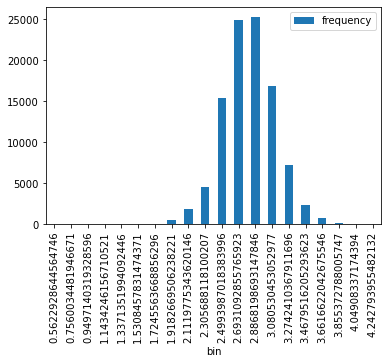

In [37]:
gre_histogram = sdf.select('totrev').rdd.flatMap(lambda x: np.log10(x)).histogram(20)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [38]:
gre_histogram

([0.5622928644564746,
  0.7560034481946671,
  0.9497140319328596,
  1.1434246156710521,
  1.3371351994092446,
  1.5308457831474371,
  1.7245563668856296,
  1.9182669506238221,
  2.1119775343620146,
  2.305688118100207,
  2.4993987018383996,
  2.6931092855765923,
  2.8868198693147846,
  3.080530453052977,
  3.2742410367911696,
  3.4679516205293623,
  3.6616622042675546,
  3.855372788005747,
  4.04908337174394,
  4.242793955482132,
  4.436504539220325],
 [3,
  1,
  4,
  7,
  10,
  20,
  74,
  568,
  1855,
  4556,
  15409,
  24861,
  25277,
  16895,
  7237,
  2340,
  729,
  130,
  22,
  2])

In [61]:
aa=sdf.select('rev_Mean').dropna(how='any').orderBy('rev_Mean', ascending=True)
aa

rev_Mean
-6.1675
-5.8625
-3.73
-2.52
-0.16
0.0
0.0
0.0
0.0
0.0


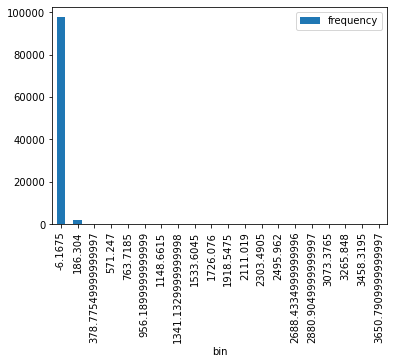

In [69]:
gre_histogram = sdf.select('rev_Mean').dropna(how='any').rdd.flatMap(lambda x: x).histogram(20)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');